<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/KNN-NAIVES-BAYES/blob/main/WEEK_9_NAIVES_BAYES_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question
Determine whether an email is spam or not.

### a) Specifying the Data Analytic Question
The specific problem is identifying whether the email is spam or not depending on the frequesncy of the content in the email.

### b) Defining the Metric for Success
- Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
- Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. 
- F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

### c) Understanding the context 
Email spam, also referred to as junk email, is unsolicited messages sent in bulk by email (spamming). 

### d) Recording the Experimental Design
The follwing is the order in which the project was carried out:

- Data sourcing
- External data validation
- Data claenaing and tidying up
- EDA
- Implementing the solution
- Building the models
- Challenging the solutions and follow up questions

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, datasets,decomposition
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB


In [ ]:
# Loading the Data from the source i.e. csv
import pandas as pd
df = pd.read_csv("spambase.data")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
with open ('spambase.names')as file:
  data = file.read()
  print(data)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
df.shape

(4600, 58)

In [ ]:
# Previewing the top of our dataset
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [ ]:
# A for loop has been used to print unique values for each column
for column in df.columns:
  print(column)
  print(df[column].nunique())
  #print(df[column].unique())
  print('\n')

0
142


0.64
171


0.64.1
214


0.1
43


0.32
255


0.2
141


0.3
173


0.4
170


0.5
144


0.6
245


0.7
113


0.64.2
316


0.8
158


0.9
133


0.10
118


0.32.1
253


0.11
197


1.29
229


1.93
575


0.12
148


0.96
401


0.13
99


0.14
164


0.15
143


0.16
395


0.17
281


0.18
240


0.19
200


0.20
156


0.21
179


0.22
128


0.23
106


0.24
184


0.25
110


0.26
177


0.27
159


0.28
188


0.29
53


0.30
163


0.31
125


0.32.2
108


0.33
186


0.34
136


0.35
160


0.36
230


0.37
227


0.38
38


0.39
106


0.40
313


0.41
641


0.42
225


0.778
963


0.43
504


0.44
316


3.756
2160


61
271


278
919


1
2




In [ ]:
df.shape

(4600, 58)

The dataset has 4600 rows and 58 columns.55 column features have float type and 3 columns are of integer type.Each value represents, for example, the number of occurrences of a term or its relative frequency.

Since Gaussian Naives Bayes prefers continous data and assumes normal distribution of the data, we will use Multinomial Naives Bayes as our dataset values are discrete values or frequencies of the different categories( data is distributed multinomially).

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

###Changing the column names

In [ ]:
#Changing the column names: creating a list of the column names in order
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our', 'word_freq_over',        
                'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',       
                'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
                'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 
                'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 
                'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
                'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
                'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',  
                'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
                'capital_run_length_total','spam'] 
df.columns= column_names

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
df.shape

(4600, 58)

The column names needed to be changed as they were numerical and did not indicate what the columns were about.

### Detecting and dealing with anomalies and outliers

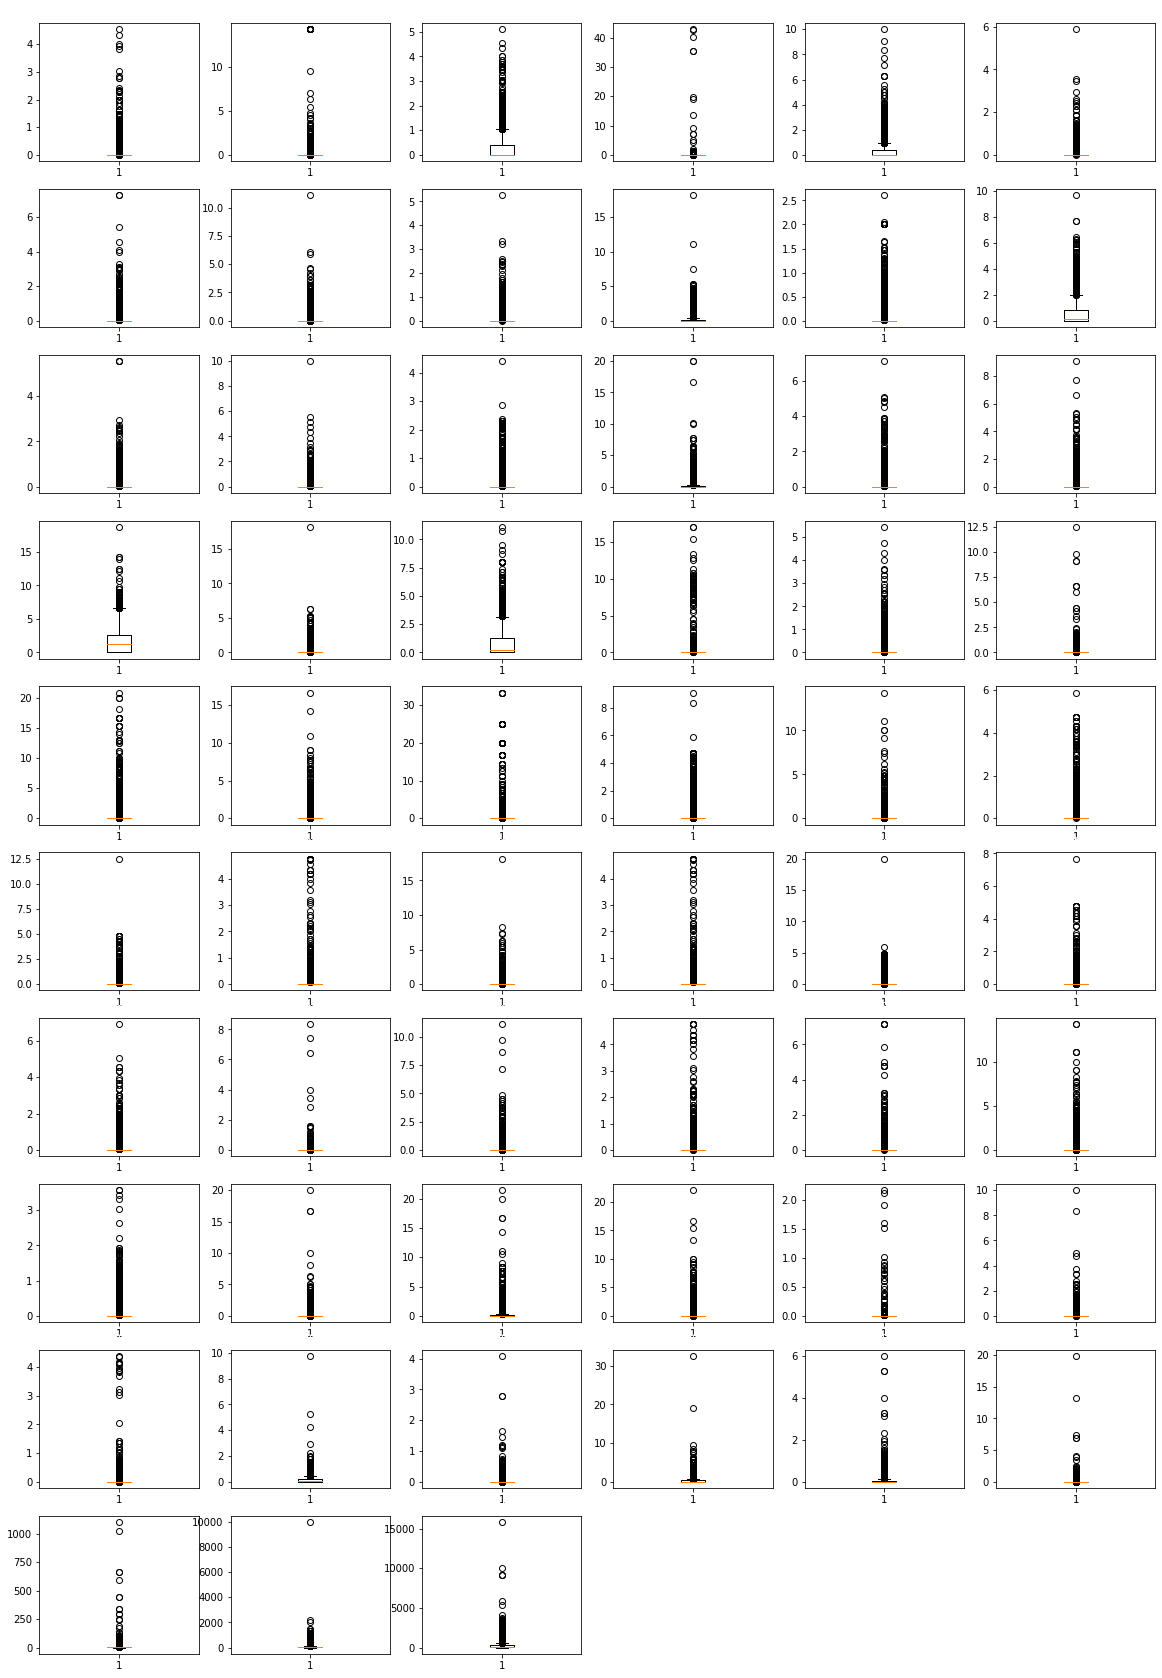

In [ ]:
# Checking for Outliers
# save the column names onto a dictionary
features_dict={ 'word_freq_make':1, 'word_freq_address':2, 'word_freq_all':3,'word_freq_3d':4,'word_freq_our':5, 'word_freq_over':6,      
                'word_freq_remove':7, 'word_freq_internet':8, 'word_freq_order':9, 'word_freq_mail':10, 'word_freq_receive':11,       
                'word_freq_will':12, 'word_freq_people':13, 'word_freq_report':14, 'word_freq_addresses':15, 'word_freq_free':16, 
                'word_freq_business':17, 'word_freq_email':18, 'word_freq_you':19, 'word_freq_credit':20, 'word_freq_your':21, 
                'word_freq_font':22, 'word_freq_000':23, 'word_freq_money':24, 'word_freq_hp':25, 'word_freq_hpl':26, 'word_freq_george':27, 
                'word_freq_650':28, 'word_freq_lab':29, 'word_freq_labs':30, 'word_freq_telnet':31, 'word_freq_857':32,
                'word_freq_data':33, 'word_freq_415':34, 'word_freq_85':35, 'word_freq_technology':36, 'word_freq_1999':37, 'word_freq_parts':38,
                'word_freq_pm':39, 'word_freq_direct':40, 'word_freq_cs':41, 'word_freq_meeting':42, 'word_freq_original':43, 'word_freq_project':44,
                'word_freq_re':45, 'word_freq_edu':46, 'word_freq_table':47, 'word_freq_conference':48, 'char_freq_;':49, 'char_freq_(':50,  
                'char_freq_[':51, 'char_freq_!':52, 'char_freq_$':53, 'char_freq_#':54, 'capital_run_length_average':55, 'capital_run_length_longest':56, 
                'capital_run_length_total':57}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in features_dict.items():
  plt.subplot(10,6,i)
  plt.boxplot(df[variable])
  plt.title(variable, color = 'white')

plt.show()

In [ ]:
# # Plotting boxplots to check for outliers
# # # #
# # fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
# # plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'purple')
# # for ax, data, column in zip(axes.flatten(), df, num_cols):
# #   sns.boxplot(df.tumor, df[column], ax = ax, hue = df.sex, palette = 'Set1')
# #   ax.set_facecolor('thistle') # Setting the background color to thistle


# boxplot = pd.DataFrame(data = df, columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
#        'bmi', 'diabetespedigreefunction', 'age', 'outcome'])

# plt.figure(figsize=(20,10))

# sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'purple').set_title('Checking for outliers using boxplots', fontsize= 15,  color='white')

In [ ]:
# Checking for Anomalies
# find quartile ranges for the column sum of bluecars_taken
q1 = df.quantile(.25)
# print(q1)
# print('************************')
q3 = df.quantile(.75)
# print(q3)
# print('************************')

# calculating inter-quartile range using values from above
iqr = q3 - q1

outliers = df[((df < q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)).any(axis=1)].index
print(outliers)
# #droping the outliers
# df = df.drop(index= outliers)
# df.shape

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599],
           dtype='int64', length=4424)


Since 4424 values are outliers we will not drop the outlier since they will not affect the model. They cant be considered outliers as our data is distributed multinomially.

### Dealing with Null values

In [ ]:
# Identifying the Missing Data
df.isnull().sum().any()

False

There are no missing values in the dataset therefore we can proceed.

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
# #Getting the percentage of columns with 0 as a frequency
zero= ['word_freq_make', 'word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our', 'word_freq_over',        
                'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',       
                'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
                'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 
                'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 
                'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
                'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
                'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',  
                'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
                'capital_run_length_total']

percentage= []
for column in zero:
  percent = df[df[column] == 0].shape[0]/df.shape[0]*100
  percentage.append(percent)
percentage 

#Drop insulin column or replace it 

[77.1086956521739,
 80.5,
 58.97826086956521,
 98.97826086956522,
 62.02173913043478,
 78.28260869565217,
 82.45652173913044,
 82.08695652173913,
 83.19565217391305,
 71.69565217391303,
 84.58695652173913,
 49.47826086956522,
 81.47826086956522,
 92.23913043478261,
 92.69565217391305,
 73.04347826086956,
 79.06521739130434,
 77.45652173913044,
 29.869565217391305,
 90.78260869565217,
 47.34782608695652,
 97.45652173913044,
 85.23913043478261,
 84.02173913043478,
 76.30434782608695,
 82.36956521739131,
 83.04347826086956,
 89.93478260869566,
 91.91304347826087,
 89.80434782608697,
 93.6304347826087,
 95.54347826086956,
 91.19565217391305,
 95.32608695652173,
 89.45652173913044,
 86.97826086956522,
 81.97826086956522,
 98.19565217391303,
 91.65217391304348,
 90.15217391304347,
 96.78260869565217,
 92.58695652173913,
 91.84782608695652,
 92.8913043478261,
 71.5,
 88.76086956521739,
 98.6304347826087,
 95.58695652173913,
 82.82608695652173,
 40.97826086956522,
 88.5,
 50.93478260869565,
 6

All columns except 3 have 0 as frequency.

In [ ]:
# # #Getting a list with the indexes where there is 0
# anomalies= ['word_freq_make', 'word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our', 'word_freq_over',        
#                 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',       
#                 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
#                 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 
#                 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 
#                 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
#                 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
#                 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
#                 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',  
#                 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']

# percentage_anomaly= []
# for column in anomalies:
#   indexes = df[df[column] == 0].index
#   for i in indexes :
#    percentage_anomaly.append(i)
# percentage_anomaly

# #Getting unique values in a list
# percentage_anomaly = list(set(percentage_anomaly))
# df = df.drop(index = (percentage_anomaly))
# df

In [ ]:
# df.insulin.skew()
# #Reaplcing the 0 with the median because the data is skewed.
# df.skinthickness.skew()

In [ ]:
# #Getting the 
# df[df['insulin'] == 0].outcome.value_counts()

In [ ]:
# df.insulin.unique()

In [ ]:
# mean_skinthickness = df.skinthickness.mean()
# df = df.replace({'skinthickness': {0 : mean_skinthickness}})

# #data=data.replace({'artist_hotness': {0: mean_artist_hotness}})

In [ ]:
# #Dropping the insulin column
# df = df.drop(['insulin'], axis = 1)
# df.head()

In [ ]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

### Univariate Analysis

Measures of central tendancies

In [ ]:
#Measures of central tendancies
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Measures f dispersion

In [ ]:
df.skew()

word_freq_make                 5.675025
word_freq_address             10.086283
word_freq_all                  3.009807
word_freq_3d                  26.224884
word_freq_our                  4.746618
word_freq_over                 5.956325
word_freq_remove               6.764849
word_freq_internet             9.723843
word_freq_order                5.225474
word_freq_mail                 8.487038
word_freq_receive              5.509622
word_freq_will                 2.867128
word_freq_people               6.954817
word_freq_report              11.753373
word_freq_addresses            6.970243
word_freq_free                10.762507
word_freq_business             5.688013
word_freq_email                5.420216
word_freq_you                  1.591611
word_freq_credit              14.601026
word_freq_your                 2.435356
word_freq_font                 9.974326
word_freq_000                  5.713128
word_freq_money               14.685513
word_freq_hp                   5.716217


In [ ]:
df.kurt()

word_freq_make                  49.294680
word_freq_address              105.631955
word_freq_all                   13.310616
word_freq_3d                   726.292795
word_freq_our                   37.932330
word_freq_over                  68.431738
word_freq_remove                75.397597
word_freq_internet             169.128434
word_freq_order                 46.930209
word_freq_mail                 161.186086
word_freq_receive               39.641894
word_freq_will                  12.547742
word_freq_people                84.924560
word_freq_report               229.152157
word_freq_addresses             57.714291
word_freq_free                 196.383129
word_freq_business              45.663797
word_freq_email                 48.052430
word_freq_you                    5.255891
word_freq_credit               382.920673
word_freq_your                   9.007245
word_freq_font                 109.117632
word_freq_000                   46.797425
word_freq_money                301

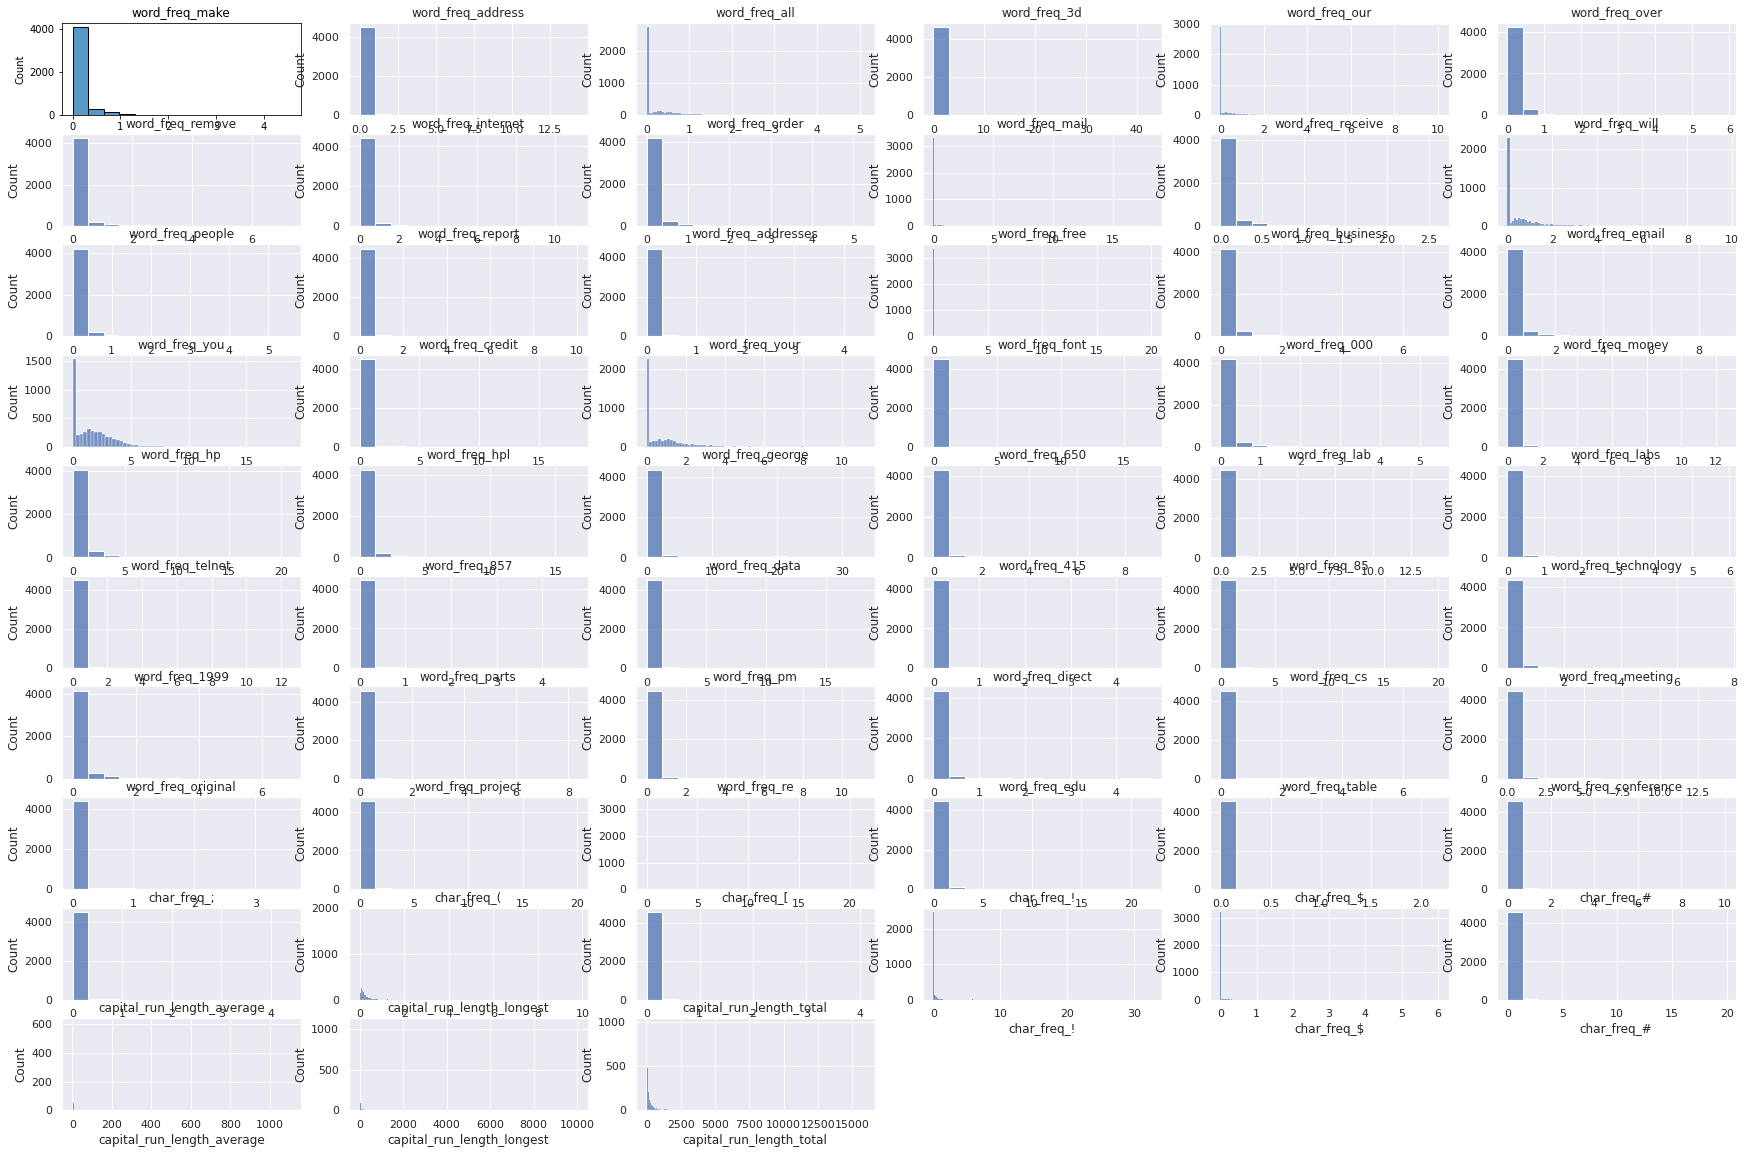

In [ ]:
# Ploting the univariate summaries and recording our observations
# make a histogram for each feature column
plt.figure(figsize=(30,20))

for variable,i in features_dict.items():
  plt.subplot(10,6,i)
  sns.histplot(df[variable])
  sns.set_theme(palette= 'deep', color_codes= False)
  plt.title(variable)

plt.show()

Most of the data is highly positively skewed and has kurtosis > 3 indicating that the data has a heavier tail than a normal distribution. Therefore we conclude our data is exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal and cannot proceed with Gaussian Niaves Bayes.

###Bivariate analysis

In [ ]:
# # Checking for Anomalies
# # find quartile ranges for the column sum of bluecars_taken
# q1 = df.quantile(.25)
# print(q1)
# print('************************')
# q3 = df.quantile(.75)
# print(q3)
# print('************************')

# # calculating inter-quartile range using values from above
# iqr = q3 - q1

# outliers = df[((df < q1 - 1.5 * iqr) | (df > q3 + 1.5 * iqr)).any(axis=1)].index


In [ ]:
# #droping the outliers
# df = df.drop(index= outliers)
# df.shape

In [ ]:
df.spam.unique()
df.spam.value_counts(normalize= True)*100

#To get to know when to downsampling, upsampling or stratify
# To get to know the metric of success(cant use accuracy score as metric)

0    60.608696
1    39.391304
Name: spam, dtype: float64

Thetarget label has an imbalanced class therefore we will use ROC-AUC score and F1 score as the metric for success for binary classification. Use accuracy score only if the classes are perfectly balanced.

In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [ ]:
df.corr()
#Plotting a heatmap
# features = df[features_dict]
# plt.figure(figsize=(15,9))
# sns.heatmap(features.corr(), annot= True)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,-0.024358,0.134053,0.188143,-0.072530,-0.061710,-0.066443,-0.048698,-0.041264,-0.052817,-0.039079,-0.032069,-0.041028,-0.027701,-0.044969,-0.054692,-0.057338,-0.007965,-0.011148,-0.036110,-0.009712,-0.026083,-0.024308,-0.022126,-0.037128,-0.034071,-0.000958,-0.017763,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
word_freq_address,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,-0.006843,-0.040406,-0.018836,-0.009194,0.005344,-0.009123,-0.018348,0.033366,-0.055488,-0.015794,-0.018200,-0.008841,-0.020481,0.001999,-0.043461,-0.038191,-0.030291,-0.029205,-0.021928,-0.027492,-0.018086,-0.003316,-0.024891,-0.004292,-0.024044,-0.028181,-0.023990,-0.008918,-0.019111,-0.014808,-0.015411,-0.025165,-0.002355,-0.019730,-0.016397,-0.023844,-0.009813,-0.015739,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
word_freq_all,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,-0.035665,0.123724,0.041181,-0.087879,-0.062417,-0.108857,-0.050615,-0.057703,-0.032514,-0.038905,-0.061852,-0.054735,-0.061687,-0.048307,-0.046469,-0.066970,0.032418,-0.014782,-0.047040,-0.030939,-0.005784,-0.044296,-0.053448,-0.050621,-0.056628,0.029351,-0.026328,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
word_freq_3d,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,-0.012980,-0.019220,-0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,-0.010832,-0.005383,0.008177,0.028101,0.011365,0.035358,-0.015185,-0.013711,-0.010687,-0.010370,-0.007799,-0.010478,-0.007531,-0.006718,-0.008077,-0.006730,-0.006124,-0.006517,-0.007765,-0.002669,-0.004604,-0.007645,-0.005672,-0.008097,-0.009270,-0.005935,-0.012960,-0.009183,-0.003349,-0.001925,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
word_freq_our,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,-0.020207,0.070039,0.000040,-0.072502,-0.075456,-0.088011,-0.061500,0.032048,-0.052066,-0.042535,-0.026748,-0.031997,-0.026960,-0.049731,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115042,-0.048878,0.015234,-0.042336,-0.077985,-0.026900,-0.032005,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
word_freq_over,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,0.053878,0.009272,0.077609,0.009660,0.173055,0.019872,0.064114,0.078547,0.095518,0.058967,0.106844,0.007948,0.211437,0.05

#### How to mark and drop highly correlated features

In [ ]:
corr_matrix = features.corr().abs()
corr_matrix.shape

(57, 57)

In [ ]:
# np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,NaN,0.016735,0.065684,0.01327,0.023120,0.059650,0.007647,0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,0.024358,0.134053,0.188143,0.072530,0.061710,0.066443,0.048698,0.041264,0.052817,0.039079,0.032069,0.041028,0.027701,0.044969,0.054692,0.057338,0.007965,0.011148,0.036110,0.009712,0.026083,0.024308,0.022126,0.037128,0.034071,0.000958,0.017763,0.026517,0.021235,0.033313,0.058342,0.117398,0.008852,0.044488,0.061387,0.089165
word_freq_address,NaN,NaN,0.033579,0.00692,0.023761,0.024815,0.003939,0.016261,0.003803,0.032989,0.006843,0.040406,0.018836,0.009194,0.005344,0.009123,0.018348,0.033366,0.055488,0.015794,0.018200,0.008841,0.020481,0.001999,0.043461,0.038191,0.030291,0.029205,0.021928,0.027492,0.018086,0.003316,0.024891,0.004292,0.024044,0.028181,0.023990,0.008918,0.019111,0.014808,0.015411,0.025165,0.002355,0.019730,0.016397,0.023844,0.009813,0.015739,0.007270,0.049802,0.018516,0.014506,0.009584,0.001953,0.002086,0.000268,0.022679
word_freq_all,NaN,NaN,NaN,0.02024,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,0.035665,0.123724,0.041181,0.087879,0.062417,0.108857,0.050615,0.057703,0.032514,0.038905,0.061852,0.054735,0.061687,0.048307,0.046469,0.066970,0.032418,0.014782,0.047040,0.030939,0.005784,0.044296,0.053448,0.050621,0.056628,0.029351,0.026328,0.033190,0.016417,0.033098,0.108054,0.087671,0.003320,0.097410,0.107462,0.070119
word_freq_3d,NaN,NaN,NaN,NaN,0.003238,0.010018,0.019781,0.010265,0.002458,0.004951,0.012980,0.019220,0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,0.010832,0.005383,0.008177,0.028101,0.011365,0.035358,0.015185,0.013711,0.010687,0.010370,0.007799,0.010478,0.007531,0.006718,0.008077,0.006730,0.006124,0.006517,0.007765,0.002669,0.004604,0.007645,0.005672,0.008097,0.009270,0.005935,0.012960,0.009183,0.003349,0.001925,0.000592,0.012376,0.007150,0.003132,0.010859,0.000299,0.005260,0.022081,0.021369
word_freq_our,NaN,NaN,NaN,NaN,NaN,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,0.020207,0.070039,0.000040,0.072502,0.075456,0.088011,0.061500,0.032048,0.052066,0.042535,0.026748,0.031997,0.026960,0.049731,0.048844,0.072599,0.130812,0.042044,0.021442,0.047505,0.115042,0.048878,0.015234,0.042336,0.077985,0.026900,0.032005,0.032759,0.046361,0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492


In [ ]:
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# result = features.corr().to_numpy()[np.triu_indices(7)]
# result

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
to_drop

['word_freq_857', 'word_freq_415', 'word_freq_technology', 'word_freq_direct']

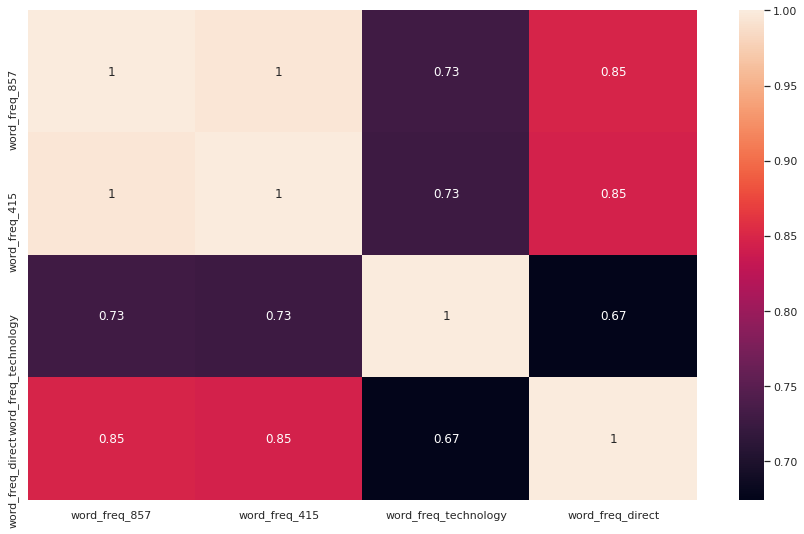

In [ ]:
#Plotting a heatmap of highly correlated columns
features = df[to_drop]
plt.figure(figsize=(15,9))
sns.heatmap(features.corr(), annot= True)

The following columns('word_freq_857', 'word_freq_415', 'word_freq_technology', 'word_freq_direct']) will be dropped as they have collinearity greater than 60% with other columns as a way to reduce features and remove those with multicollinerity.

## 7. Implementing the Solution

In [ ]:
df.max()-df.min()

word_freq_make                    4.540
word_freq_address                14.280
word_freq_all                     5.100
word_freq_3d                     42.810
word_freq_our                    10.000
word_freq_over                    5.880
word_freq_remove                  7.270
word_freq_internet               11.110
word_freq_order                   5.260
word_freq_mail                   18.180
word_freq_receive                 2.610
word_freq_will                    9.670
word_freq_people                  5.550
word_freq_report                 10.000
word_freq_addresses               4.410
word_freq_free                   20.000
word_freq_business                7.140
word_freq_email                   9.090
word_freq_you                    18.750
word_freq_credit                 18.180
word_freq_your                   11.110
word_freq_font                   17.100
word_freq_000                     5.450
word_freq_money                  12.500
word_freq_hp                     20.830


##GAUSSIAN NAIVES BAYES

###**80% training & 20% test set**

In [ ]:
# Implementing the Solution()
# splitting the dataset into training and test set
# X = df.iloc[:, :-1].values
# y = df['outcome']

X = df.drop(['word_freq_857', 'word_freq_415', 'word_freq_technology', 'word_freq_direct','spam'], axis=1)
y = df['spam']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify = y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Data reduction

In [ ]:
# Random forest to see important features
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: word_freq_remove     Importance: 0.13
Variable: char_freq_;          Importance: 0.13
Variable: word_freq_conference Importance: 0.12
Variable: word_freq_money      Importance: 0.11
Variable: word_freq_free       Importance: 0.09
Variable: word_freq_your       Importance: 0.08
Variable: char_freq_!          Importance: 0.06
Variable: char_freq_[          Importance: 0.05
Variable: word_freq_hp         Importance: 0.04
Variable: word_freq_000        Importance: 0.03
Variable: word_freq_george     Importance: 0.03
Variable: char_freq_$          Importance: 0.03
Variable: word_freq_hpl        Importance: 0.02
Variable: word_freq_our        Importance: 0.01
Variable: word_freq_over       Importance: 0.01
Variable: word_freq_receive    Importance: 0.01
Variable: word_freq_business   Importance: 0.01
Variable: word_freq_you        Importance: 0.01
Variable: word_freq_credit     Importance: 0.01
Variable: word_freq_make       Importance: 0.0
Variable: word_freq_address    Importance

The important features which will be used include the following: 
- Variable: word_freq_remove     Importance: 0.13
- Variable: char_freq_;          Importance: 0.13
- Variable: word_freq_conference Importance: 0.12
- Variable: word_freq_money      Importance: 0.11
- Variable: word_freq_free       Importance: 0.09
- Variable: word_freq_your       Importance: 0.08
- Variable: char_freq_!          Importance: 0.06
- Variable: char_freq_[          Importance: 0.05
- Variable: word_freq_hp         Importance: 0.04
- Variable: word_freq_000        Importance: 0.03
- Variable: word_freq_george     Importance: 0.03
- Variable: char_freq_$          Importance: 0.03
- Variable: word_freq_hpl        Importance: 0.02
- Variable: word_freq_our        Importance: 0.01
- Variable: word_freq_over       Importance: 0.01
- Variable: word_freq_receive    Importance: 0.01
- Variable: word_freq_business   Importance: 0.01
- Variable: word_freq_you        Importance: 0.01
- Variable: word_freq_credit     Importance: 0.01

#### Training the 80/20 model

In [ ]:
#Splittig the datset 
X1 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = df['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X1, y1, test_size = 0.2, random_state= 42)#, stratify = y)

In [ ]:
#Training our model
gnb = GaussianNB( )
modelgnb80 = gnb.fit(X_train80, y_train80)

In [ ]:
# Predicting our test predictors
predicted80 = modelgnb80.predict(X_test80)
print(predicted80)
print(y_test80)
print(np.mean(predicted80))
print(np.mean(y_test80))
# computes the fraction of correctly predicted labels
print(np.mean(predicted80 == y_test80))

[1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 0 1 1 1 

**Evaluating the Gaussian Naives Bayes 80/20 model**

In [ ]:
print("Accuracy score:", metrics.accuracy_score(y_test80, predicted80))
print("F1 Score:", metrics.f1_score(y_test80, predicted80))

Accuracy score: 0.7217391304347827
F1 Score: 0.7450199203187252


ROC AUC score

In [ ]:
predicted_probability80 = gnb.predict_proba(X_test80)
predicted_probability80_1 = predicted_probability[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test80,predicted_probability80_1 )

0.49535074987905175

Confusion matrix and classification report.

In [ ]:
print( metrics.confusion_matrix(y_test80, predicted80))

[[290 240]
 [ 16 374]]


In [ ]:
print( metrics.classification_report(y_test80, predicted80))

              precision    recall  f1-score   support

           0       0.95      0.55      0.69       530
           1       0.61      0.96      0.75       390

    accuracy                           0.72       920
   macro avg       0.78      0.75      0.72       920
weighted avg       0.80      0.72      0.72       920



Summary 80/20
- Accuracy score: 0.7217391304347827
- F1 Score: 0.7450199203187252
- Roc-auc - 0.49535074987905175
- Confusion matrix- 290 TN & 374 TP, with 256 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.
- The model has a 95% precision for class 0 and 61% precision for class 1. 

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.
- The model has a 55% recall for class 0 and 96% recall for class 1. 

Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus.
Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

**F-Measure = (2 * Precision * Recall) / (Precision + Recall) **
This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems.
The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data.
Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0
- The model has a f1 score 0.69 for class0 and 0.75 for class 1.
- Conclusion, the model has great precision and poor recall for class 0 and poor presicion and great recall for class 1 with generally good f1 scores for both classes.

#### Training the 70/30 model

In [ ]:
#Splittig the datset into 70% training and 30% test
X1 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = df['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

# Predicting our test predictors
predicted70 = modelgnb70.predict(X_test70)
print(predicted70)
print(y_test70)
print(np.mean(predicted70))
print(np.mean(y_test70))
# computes the fraction of correctly predicted labels
print(np.mean(predicted70 == y_test70))

[1 1 0 ... 1 1 0]
3683    0
4411    0
2584    0
69      1
1844    0
       ..
3437    0
3340    0
1289    1
449     1
3774    0
Name: spam, Length: 1380, dtype: int64
0.6717391304347826
0.4181159420289855
0.717391304347826


**Evaluating the 70/30 model**

In [ ]:
print("Accuracy score:", metrics.accuracy_score(y_test70, predicted70))
print("F1 Score:", metrics.f1_score(y_test70, predicted70))

Accuracy score: 0.717391304347826
F1 Score: 0.7406914893617021


In [ ]:
predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test70,predicted_probability70_1 )

0.9296075591747585

Confusion matric and classification report

In [ ]:
print( metrics.confusion_matrix(y_test70, predicted70))

[[433 370]
 [ 20 557]]


In [ ]:
print( metrics.classification_report(y_test70, predicted70))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       803
           1       0.60      0.97      0.74       577

    accuracy                           0.72      1380
   macro avg       0.78      0.75      0.72      1380
weighted avg       0.81      0.72      0.71      1380



Summary 70/30

- Accuracy score: 0.717391304347826
- F1 Score: 0.7406914893617021
- Roc-auc - 0.9296075591747585
- Confusion matrix- 433 TN & 557 TP, with 390 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 96% precision for class 0 and 60% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 54% recall for class 0 and 97% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.69 for class0 and 0.74 for class 1.
Conclusion, the model has great precision and poor recall for class 0 and poor presicion and great recall for class 1 with generally good f1 scores for both classes. 

Compared to the 80/20 model there is bery little difference between the model except for ROC score which is higher in the 70/30 model. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

####Training the 60/40 model

In [ ]:
#Splittig the datset into 70% training and 30% test
X1 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = df['spam']

X_train60, X_test60,y_train60, y_test60 = train_test_split(X1, y1, test_size = 0.4, random_state= 42)#, stratify = y)

#Training our model
gnb = GaussianNB( )
modelgnb60 = gnb.fit(X_train60, y_train60)

# Predicting our test predictors
predicted60 = modelgnb60.predict(X_test60)
print(predicted60)
print(y_test60)
print(np.mean(predicted60))
print(np.mean(y_test60))
# computes the fraction of correctly predicted labels
print(np.mean(predicted60 == y_test60))

[1 1 0 ... 0 0 1]
3683    0
4411    0
2584    0
69      1
1844    0
       ..
572     1
1971    0
3323    0
2977    0
288     1
Name: spam, Length: 1840, dtype: int64
0.6652173913043479
0.4081521739130435
0.7157608695652173


In [ ]:
print("Accuracy score:", metrics.accuracy_score(y_test60, predicted60))
print("F1 Score:", metrics.f1_score(y_test60, predicted60))

Accuracy score: 0.7157608695652173
F1 Score: 0.7351898734177215


In [ ]:
predicted_probability60 = gnb.predict_proba(X_test60)
predicted_probability60_1 = predicted_probability60[:, 1]
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test60,predicted_probability60_1 )

0.9346650135295577

Confusion matrix and classification report

In [ ]:
print( metrics.confusion_matrix(y_test60, predicted60))

[[591 498]
 [ 25 726]]


In [ ]:
print( metrics.classification_report(y_test60, predicted60))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69      1089
           1       0.59      0.97      0.74       751

    accuracy                           0.72      1840
   macro avg       0.78      0.75      0.71      1840
weighted avg       0.81      0.72      0.71      1840



Summary 60/40

- Accuracy score: 0.7157608695652173
- F1 Score: 0.7351898734177215
- Roc-auc - 0.9346650135295577
- Confusion matrix- 591 TN & 726 TP, with 523 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 96% precision for class 0 and 59% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 54% recall for class 0 and 97% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.69 for class0 and 0.74 for class 1.
Conclusion, the model has great precision and poor recall for class 0 and poor presicion and great recall for class 1 with generally good f1 scores for both classes. 

Compared to the 80/20 model and 70/30 there is very little difference between the models. With the exeption of ROC score which is higher in the 70/30 model(0.92) and 60/40 model(0.93). The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

***We will therefore improve the 70/30 model as it gives us good metrices of success with a good distribution etween the training and testing sets.***

### Improving the model performance

*Upsampling*

In [ ]:
#Upsampling with normalization
# Implementing the Solution()
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

min_upsampled = resample(min, 
                         replace=True,     # sample with replacement
                         n_samples=max.shape[0],    # to match majority class
                         random_state=24)
print(max.shape)
print(min_upsampled.shape)

upsampled = pd.concat([max, min_upsampled])
upsampled
#Splittig the datset into 70% training and 30% test
X1 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = upsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm= 'l2').fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))

print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

#Normalization drops compared to MinMaxcaller


(2788, 58)
(1812, 58)
(2788, 58)
(2788, 58)
ROC-AUC SCORE 0.9460910302144668


In [ ]:
#Upsampling with minmax scaler
# Implementing the Solution()
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

min_upsampled = resample(min, 
                         replace=True,     # sample with replacement
                         n_samples=max.shape[0],    # to match majority class
                         random_state=24)
print(max.shape)
print(min_upsampled.shape)

upsampled = pd.concat([max, min_upsampled])
upsampled
#Splittig the datset into 70% training and 30% test
X1 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = upsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))
print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

(2788, 58)
(1812, 58)
(2788, 58)
(2788, 58)
ROC-AUC SCORE 0.9476060514892336


In [ ]:
#Upsampling with normalization
# Implementing the Solution()
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

min_upsampled = resample(min, 
                         replace=True,     # sample with replacement
                         n_samples=max.shape[0],    # to match majority class
                         random_state=24)
print(max.shape)
print(min_upsampled.shape)

upsampled = pd.concat([max, min_upsampled])
upsampled
#Splittig the datset into 70% training and 30% test
X1 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = upsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))
print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

(2788, 58)
(1812, 58)
(2788, 58)
(2788, 58)
ROC-AUC SCORE 0.9474570564891619


*Downsampling*

In [ ]:
#Downsampling with normalzation
# Implementing the Solution()
# splitting the dataset into training and test set
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

max_downsampled = resample(max, 
                         replace=False,     # sample with replacement
                         n_samples=min.shape[0],    # to match majority class
                         random_state=24)
print(min.shape)
print(max_downsampled.shape)

downsampled = pd.concat([min, max_downsampled])
downsampled

#Splittig the datset into 70% training and 30% test
X1 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = downsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm= 'l2').fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))
print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

(2788, 58)
(1812, 58)
(1812, 58)
(1812, 58)
ROC-AUC SCORE 0.9281473809620512


In [ ]:
#Downsampling with Minmax scaler
# Implementing the Solution()
# splitting the dataset into training and test set
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

max_downsampled = resample(max, 
                         replace=False,     # sample with replacement
                         n_samples=min.shape[0],    # to match majority class
                         random_state=24)
print(min.shape)
print(max_downsampled.shape)

downsampled = pd.concat([min, max_downsampled])
downsampled

#Splittig the datset into 70% training and 30% test
X1 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = downsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))
print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

(2788, 58)
(1812, 58)
(1812, 58)
(1812, 58)
ROC-AUC SCORE 0.9234901100686407


In [ ]:
#Downsamlig with rubust scaler
# Implementing the Solution()
# splitting the dataset into training and test set
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

max_downsampled = resample(max, 
                         replace=False,     # sample with replacement
                         n_samples=min.shape[0],    # to match majority class
                         random_state=24)
print(min.shape)
print(max_downsampled.shape)

downsampled = pd.concat([min, max_downsampled])
downsampled

#Splittig the datset into 70% training and 30% test
X1 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y1 = downsampled['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X1, y1, test_size = 0.3, random_state= 42)#, stratify = y)


from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train70)
X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

#Training our model
gnb = GaussianNB( )
modelgnb70 = gnb.fit(X_train70, y_train70)

predicted_probability70 = gnb.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score
#print("F1 Score:", metrics.f1_score(y_test70, predicted70))
print('ROC-AUC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

(2788, 58)
(1812, 58)
(1812, 58)
(1812, 58)
ROC-AUC SCORE 0.9232007229600748


##MULTINOMIAL NAIVES BAYES

###Training the 80/20 model

In [ ]:
#Splittig the datset into 70% training and 30% test
X2 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = df['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

# Predicting our test predictors
predicted_mnb80 = modelmnb80.predict(X_test80)
# print(predicted_mnb80)
# print(y_test80)
print(np.mean(predicted_mnb80))
print(np.mean(y_test80))
# computes the fraction of correctly predicted labels
print(np.mean(predicted_mnb80 == y_test80))

print("Accuracy score:", metrics.accuracy_score(y_test80, predicted_mnb80))
print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

0.5673913043478261
0.42391304347826086
0.8065217391304348
Accuracy score: 0.8065217391304348
F1 Score: 0.8048245614035088


Evaluating the model

In [ ]:
predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
print( metrics.confusion_matrix(y_test80, predicted_mnb80))

print( metrics.classification_report(y_test80, predicted_mnb80))

ROC SCORE 0.9386332849540396
[[375 155]
 [ 23 367]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       530
           1       0.70      0.94      0.80       390

    accuracy                           0.81       920
   macro avg       0.82      0.82      0.81       920
weighted avg       0.84      0.81      0.81       920



Summary 80/20

- Accuracy score: 0.806
- F1 Score: 0.804
- Roc-auc - 0.938
- Confusion matrix- 375 TN & 367 TP, with 178 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 94% precision for class 0 and 70% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 71% recall for class 0 and 94% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.81 for class0 and 0.80 for class 1.
Conclusion, the model has great precision and good recall for class 0 and good presicion and great recall for class 1 with generally good f1 scores for both classes.

### Training the 70/30 model

In [ ]:
#Splittig the datset into 70% training and 30% test
X2 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = df['spam']

X_train70, X_test70,y_train70, y_test70 = train_test_split(X2, y2, test_size = 0.3, random_state= 42)#, stratify = y)

#Training our model
mnb = MultinomialNB( )
modelmnb70 = mnb.fit(X_train70, y_train70)

# Predicting our test predictors
predicted_mnb70 = modelmnb70.predict(X_test70)
# print(predicted_mnb70)
# print(y_test70)
print(np.mean(predicted_mnb70))
print(np.mean(y_test70))
# computes the fraction of correctly predicted labels
print(np.mean(predicted_mnb70 == y_test70))

print("Accuracy score:", metrics.accuracy_score(y_test70, predicted_mnb70))
print("F1 Score:", metrics.f1_score(y_test70, predicted_mnb70))

0.5695652173913044
0.4181159420289855
0.8094202898550724
Accuracy score: 0.8094202898550724
F1 Score: 0.8070432868672047


Evaluating the model

In [ ]:
predicted_probability_mnb70 = mnb.predict_proba(X_test70)
predicted_probability_mnb70_1 = predicted_probability_mnb70[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE', roc_auc_score(y_test70,predicted_probability_mnb70_1 ))
print( metrics.confusion_matrix(y_test70, predicted_mnb70))

print( metrics.classification_report(y_test70, predicted_mnb70))

ROC SCORE 0.9393478959965985
[[567 236]
 [ 27 550]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       803
           1       0.70      0.95      0.81       577

    accuracy                           0.81      1380
   macro avg       0.83      0.83      0.81      1380
weighted avg       0.85      0.81      0.81      1380



Summary 80/20

- Accuracy score: 0.809
- F1 Score: 0.807
- Roc-auc - 0.939
- Confusion matrix- 567 TN & 550 TP, with 263 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 95% precision for class 0 and 70% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 71% recall for class 0 and 95% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.81 for class0 and 0.81 for class 1.
Conclusion, the model has great precision and good recall for class 0 and good presicion and great recall for class 1 with generally good f1 scores for both classes.

### Training the 60/40 model

In [ ]:
#Splittig the datset into 70% training and 30% test
X2 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = df['spam']

X_train60, X_test60,y_train60, y_test60 = train_test_split(X2, y2, test_size = 0.4, random_state= 42)#, stratify = y)

#Training our model
mnb = MultinomialNB( )
modelmnb60 = mnb.fit(X_train60, y_train60)

# Predicting our test predictors
predicted_mnb60 = modelmnb60.predict(X_test60)
# print(predicted_mnb60)
# print(y_test60)
print(np.mean(predicted_mnb60))
print(np.mean(y_test60))
# computes the fraction of correctly predicted labels
print(np.mean(predicted_mnb60 == y_test60))

print("Accuracy score:", metrics.accuracy_score(y_test60, predicted_mnb60))
print("F1 Score:", metrics.f1_score(y_test60, predicted_mnb60))

0.5614130434782608
0.4081521739130435
0.808695652173913
Accuracy score: 0.808695652173913
F1 Score: 0.8026905829596412


Evaluating the model

In [ ]:
predicted_probability_mnb60 = mnb.predict_proba(X_test60)
predicted_probability_mnb60_1 = predicted_probability_mnb60[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE', roc_auc_score(y_test60,predicted_probability_mnb60_1 ))
print( metrics.confusion_matrix(y_test60, predicted_mnb60))

print( metrics.classification_report(y_test60, predicted_mnb60))

ROC SCORE 0.9455687488613285
[[772 317]
 [ 35 716]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      1089
           1       0.69      0.95      0.80       751

    accuracy                           0.81      1840
   macro avg       0.82      0.83      0.81      1840
weighted avg       0.85      0.81      0.81      1840



Summary 80/20

- Accuracy score: 0.808
- F1 Score: 0.802
- Roc-auc - 0.94
- Confusion matrix- 772 TN & 716 TP, with 352 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 96% precision for class 0 and 69% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 71% recall for class 0 and 95% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.81 for class0 and 0.80 for class 1.
Conclusion, the model has great precision and good recall for class 0 and good presicion and great recall for class 1 with generally good f1 scores for both classes.

###Improving the model performance

*Upsampling*

In [ ]:
#Upsampling with normalization
# Implementing the Solution()
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

min_upsampled = resample(min, 
                         replace=True,     # sample with replacement
                         n_samples=max.shape[0],    # to match majority class
                         random_state=24)
print(max.shape)
print(min_upsampled.shape)

upsampled = pd.concat([max, min_upsampled])
upsampled
#Splittig the datset into 70% training and 30% test
X2 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = upsampled['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm= 'l2').fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
#print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))


(2788, 58)
(1812, 58)
(2788, 58)
(2788, 58)
ROC SCORE 0.9675975354060277


In [ ]:
#Upsampling with minmax
# Implementing the Solution()
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

min_upsampled = resample(min, 
                         replace=True,     # sample with replacement
                         n_samples=max.shape[0],    # to match majority class
                         random_state=24)
print(max.shape)
print(min_upsampled.shape)

upsampled = pd.concat([max, min_upsampled])
upsampled
#Splittig the datset into 70% training and 30% test
X2 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = upsampled['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
#print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

(2788, 58)
(1812, 58)
(2788, 58)
(2788, 58)
ROC SCORE 0.958763715414003


In [ ]:
# #Upsampling with robust scaler
# # Implementing the Solution()
# from sklearn.utils import resample
# max = df[df.spam == 0]
# min = df[df.spam ==1]
# print(max.shape)
# print(min.shape)

# min_upsampled = resample(min, 
#                          replace=True,     # sample with replacement
#                          n_samples=max.shape[0],    # to match majority class
#                          random_state=24)
# print(max.shape)
# print(min_upsampled.shape)

# upsampled = pd.concat([max, min_upsampled])
# upsampled
# #Splittig the datset into 70% training and 30% test
# X2 = upsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
#          'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
#          'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
#          'word_freq_business', 'word_freq_you', 'word_freq_credit']]
# y2 = upsampled['spam']

# X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler().fit(X_train80)
# X_train80 = scaler.transform(X_train80)
# X_test80 = scaler.transform(X_test80)

# #Training our model
# mnb = MultinomialNB( )
# modelmnb80 = mnb.fit(X_train80, y_train80)

# predicted_probability_mnb80 = mnb.predict_proba(X_test80)
# predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
# from sklearn.metrics import roc_auc_score

# print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
# #print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

*Downsampling*

In [ ]:
#Upsampling with normalization
# splitting the dataset into training and test set
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

max_downsampled = resample(max, 
                         replace=False,     # sample with replacement
                         n_samples=min.shape[0],    # to match majority class
                         random_state=24)
print(min.shape)
print(max_downsampled.shape)

downsampled = pd.concat([min, max_downsampled])
downsampled
#Splittig the datset into 70% training and 30% test
X2 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = downsampled['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm= 'l2').fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
#print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

(2788, 58)
(1812, 58)
(1812, 58)
(1812, 58)
ROC SCORE 0.9435501082350072


In [ ]:
#Upsampling with minmaxscaler
# splitting the dataset into training and test set
from sklearn.utils import resample
max = df[df.spam == 0]
min = df[df.spam ==1]
print(max.shape)
print(min.shape)

max_downsampled = resample(max, 
                         replace=False,     # sample with replacement
                         n_samples=min.shape[0],    # to match majority class
                         random_state=24)
print(min.shape)
print(max_downsampled.shape)

downsampled = pd.concat([min, max_downsampled])
downsampled
#Splittig the datset into 70% training and 30% test
X2 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = downsampled['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
#print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

(2788, 58)
(1812, 58)
(1812, 58)
(1812, 58)
ROC SCORE 0.9424448916125492


In [ ]:
# #Upsampling with normalization
# # splitting the dataset into training and test set
# from sklearn.utils import resample
# max = df[df.spam == 0]
# min = df[df.spam ==1]
# print(max.shape)
# print(min.shape)

# max_downsampled = resample(max, 
#                          replace=False,     # sample with replacement
#                          n_samples=min.shape[0],    # to match majority class
#                          random_state=24)
# print(min.shape)
# print(max_downsampled.shape)

# downsampled = pd.concat([min, max_downsampled])
# downsampled
# #Splittig the datset into 70% training and 30% test
# X2 = downsampled[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
#          'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
#          'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
#          'word_freq_business', 'word_freq_you', 'word_freq_credit']]
# y2 = downsampled['spam']

# X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42)#, stratify = y)


# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler().fit(X_train80)
# X_train80 = scaler.transform(X_train80)
# X_test80 = scaler.transform(X_test80)

# #Training our model
# mnb = MultinomialNB( )
# modelmnb80 = mnb.fit(X_train80, y_train80)

# predicted_probability_mnb80 = mnb.predict_proba(X_test80)
# predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
# from sklearn.metrics import roc_auc_score

# print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
# #print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

The best model is the Multinomimial Naives Bayes model with 80% training data and 20% testing data. It has F1 score of and ROC-AUC score of

After improving the model the best parameters to use are which give us the best ROC-AUC of 0.96 is upsampling and normalizing the 80% training and 20% testing set.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:

#Splittig the datset into 80% training and 20% test
X2 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = df['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42, stratify = y)


from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2').fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

ROC SCORE 0.9601551515871601
F1 Score: 0.45701357466063347


In [ ]:
#Splittig the datset into 80% training and 20% test
X2 = df[['word_freq_remove', 'char_freq_;', 'word_freq_conference', 'word_freq_money','word_freq_free','word_freq_your',
         'char_freq_!', 'char_freq_[','word_freq_hp', 'word_freq_000', 'word_freq_george', 
         'char_freq_$', 'word_freq_hpl', 'word_freq_our', 'word_freq_over', 'word_freq_receive',
         'word_freq_business', 'word_freq_you', 'word_freq_credit']]
y2 = df['spam']

X_train80, X_test80,y_train80, y_test80 = train_test_split(X2, y2, test_size = 0.2, random_state= 42, stratify = y)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train80)
X_train80 = scaler.transform(X_train80)
X_test80 = scaler.transform(X_test80)

#Training our model
mnb = MultinomialNB( )
modelmnb80 = mnb.fit(X_train80, y_train80)

predicted_probability_mnb80 = mnb.predict_proba(X_test80)
predicted_probability_mnb80_1 = predicted_probability_mnb80[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test80,predicted_probability_mnb80_1 ))
print("F1 Score:", metrics.f1_score(y_test80, predicted_mnb80))

ROC SCORE 0.960677439157211
F1 Score: 0.45701357466063347


Stratifyinh the dataset due to the imbalanced classes improves the Multinomial Niaves Bayes Model from 0.94 to 0.96 and can therefore be used as a better superior model in predicting the email as spam or good mail.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
Yes we did

### b). Do we need other data to answer our question?
 No we dont.

### c). Did we have the right question?
Yes we do